In [ ]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

In [ ]:
# Your code here
incidents_df = pd.read_csv("https://raw.githubusercontent.com/pomerantzj622/cs329e-project/main/Real-Time_Traffic_Incident_Reports-march22collisions.csv")
incidents_df = incidents_df[:2000]

In [ ]:
print(incidents_df)

# Possible stuff:
'''
-distribution of issue types
-most common serious accident
-location analysis? its all austin though
-most common times for each type of issue, then times for all issues
-day of week with most accidents


'''

                                      Traffic Report ID  \
0     DB5C7A38682220A648B9DA7964B252D846B03084_16472...   
1     3429E6FF2453B636C76961E066DA7C3CFA5BB260_16472...   
2     7EFCFF1109F39E9E6E7DE0CCA5E32B3ED88FCDC9_16472...   
3     4A1432C03DFFE532268819E1F8AB3083818ACE50_16472...   
4     80D5B2A867B21E37CD472071370518DF40FA4F01_16472...   
...                                                 ...   
1995  7A20AC5AEB7C70ACDEAC71C9D4EBE7AC17F7CE7E_16467...   
1996  765BB5D5E39445C7F56B5554B9BA0D431132F818_16467...   
1997  8D4F80DF0D37819CDE3E3D2BB9982D111EBAC97C_16467...   
1998  54C1792C99A96A96A2881600F0CCE1D81061E8B8_16467...   
1999  FBAACB960902382E4F6C96F2D8F225C24EECADB4_16467...   

                    Published Date         Issue Reported  \
0     03/14/2022 07:39:49 AM +0000           Crash Urgent   
1     03/14/2022 07:25:23 AM +0000  COLLISION WITH INJURY   
2     03/14/2022 08:17:28 AM +0000           Crash Urgent   
3     03/14/2022 11:55:20 AM +0000          Cra

'\n-distribution of issue types\n-most common serious accident\n-location analysis? its all austin though\n-most common times for each type of issue, then times for all issues\n-day of week with most accidents\n\n\n'

Crash Urgent                  945
COLLISION                     446
Crash Service                 407
COLLISION WITH INJURY          89
COLLISN/ LVNG SCN              75
COLLISION/PRIVATE PROPERTY     23
VEHICLE FIRE                   15
Name: Issue Reported, dtype: int64


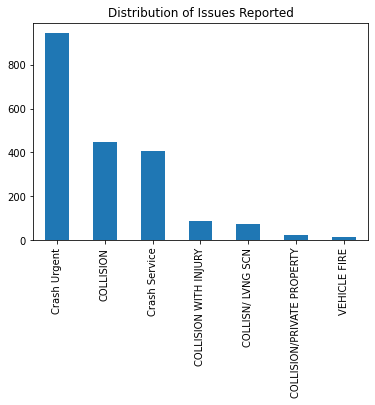

In [ ]:
# Darren
series = incidents_df['Issue Reported'].value_counts()
print((series))
p1 = series.plot(kind='bar', title='Distribution of Issues Reported')

In [ ]:
# Jared (I'm eventually going to try to get a better picture)
latitude = incidents_df['Latitude']
longitude = incidents_df['Longitude']
location = pd.concat([latitude, longitude], axis=1)
res = location.loc[location['Latitude'] > 25]

img = plt.imread('https://raw.githubusercontent.com/pomerantzj622/cs329e-project/main/map.PNG')
fig, ax = plt.subplots()
ax.imshow(img, extent=[29.9, 30.7, -98.2, -97.3])
ax.scatter(res['Latitude'], res['Longitude'], 1, marker='.')

In [ ]:
# Arturo
import datetime

# gets day of the week from data (Mon, ..., Sun)
def get_weekday(x):
    # remove time from entry
    date = x.split(" ")[0]
    
    # get month, day, year
    month, day, year = date.split("/")
    
    # week day number [0, ..., 6]. Monday is day 0
    day_n = datetime.datetime(int(year), int(month), int(day)).weekday()
    
    # return day of the week
    return ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"][day_n]



# get day of the week for each entry
day_of_week = pd.Series(incidents_df["Published Date"].apply(lambda x: get_weekday(x)), name = "DayofWeek")


# number of accidents per week day
print(day_of_week.value_counts())

plot = day_of_week.value_counts().plot(kind='bar', title='Total Accidents per Week Day')

Tue    354
Wed    316
Mon    291
Thu    287
Fri    266
Sun    246
Sat    240
Name: DayofWeek, dtype: int64


Text(0, 0.5, 'Frequency')

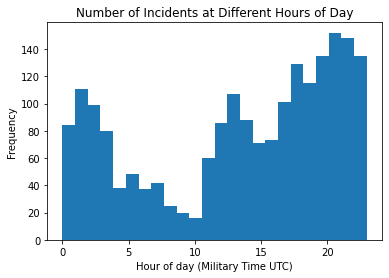

In [ ]:
# Dao
def convert_milit_time(row):
  mtime = row[1]

  rtime_hms = row[1].split(':')

  if row[2] == 'PM':
    if int(rtime_hms[0]) != 12:
      mtime = str( int(rtime_hms[0]) + 12) + ':' + rtime_hms[1] + ':' + rtime_hms[2]
  else: #AM
    if int(rtime_hms[0]) == 12:
      mtime = str('00') + ':' + rtime_hms[1] + ':' + rtime_hms[2]

  return mtime

date_time = incidents_df['Published Date'].str.split()

milit_times = date_time.apply(lambda x: convert_milit_time(x))

milit_hms = pd.DataFrame(milit_times.str.split(':').values.tolist())

milit_hr = milit_hms[0].apply(lambda x: int(x))
milit_hr = pd.Series(milit_hr, name = 'UTC Hour of Day')
plt.hist(milit_hr, 24)
plt.title('Number of Incidents at Different Hours of Day')
plt.xlabel('Hour of day (Military Time UTC)')
plt.ylabel('Frequency')

In [ ]:
def get_weekday(x):
    # remove time from entry
    date = x.split(" ")[0]
    
    # get month, day, year
    month, day, year = date.split("/")
    
    # week day number [0, ..., 6]. Monday is day 0
    day_n = datetime.datetime(int(year), int(month), int(day)).weekday()
    
    # return day of the week
    return day_n

# get day of the week for each entry
nday_of_week = pd.Series(incidents_df["Published Date"].apply(lambda x: get_weekday(x)), name = "DayofWeek")

# CONCAT nday_of_week, milit_times, lat, and longit, once all have been fixed

alg_df = pd.concat([nday_of_week, milit_hr, incidents_df['Latitude'], 
                    incidents_df['Longitude']], axis = 1)
alg_df

DayofWeek  UTC Hour of Day   Latitude  Longitude
0             0                7  30.220212 -97.707080
1             0                7  30.249375 -97.606178
2             0                8  30.314745 -97.720788
3             0               11  30.391289 -97.829776
4             0               11  30.157092 -97.715450
...         ...              ...        ...        ...
1995          2                0  30.242560 -97.690015
1996          2                0  30.527318 -97.928318
1997          2                1  30.238671 -97.789277
1998          2                1  30.408085 -97.679554
1999          2                2  30.258934 -97.714632

[2000 rows x 4 columns]

In [ ]:
print(incidents_df['Published Date'])
import datetime
from dateutil import tz

from_zone = tz.gettz('UTC')
to_zone = tz.gettz('America/Chicago')

json_data = {'time': "03/14/2022 07:39:49 AM +0000"} 
utc = datetime.datetime.strptime(json_data['time'], "%m/%d/%Y %H:%M:%S %p +0000")
nday_of_week = pd.Series(incidents_df["Published Date"].apply(lambda x: get_weekday(x)), name = "DayofWeek")

utc_objs = pd.Series(incidents_df["Published Date"].apply(lambda x:  datetime.datetime.strptime(x, "%m/%d/%Y %H:%M:%S %p +0000")))
test = utc_objs[0]
print(test)
#utc = utc.replace(tzinfo=from_zone)
#cst = utc.astimezone(to_zone)
#print(utc)
#print(cst)

0       03/14/2022 07:39:49 AM +0000
1       03/14/2022 07:25:23 AM +0000
2       03/14/2022 08:17:28 AM +0000
3       03/14/2022 11:55:20 AM +0000
4       03/14/2022 11:21:34 AM +0000
                    ...             
1995    03/09/2022 12:31:37 AM +0000
1996    03/09/2022 12:50:28 AM +0000
1997    03/09/2022 01:37:52 AM +0000
1998    03/09/2022 01:10:42 AM +0000
1999    03/09/2022 02:06:17 AM +0000
Name: Published Date, Length: 2000, dtype: object
2022-03-14 07:39:49


In [ ]:
alg_df # x group
targ = incidents_df['Issue Reported']

from sklearn.model_selection import train_test_split
# splitting into 80% training and 20% test data
X_train, X_test, y_train, y_test = train_test_split(alg_df, targ, test_size=0.2, random_state=0)


from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state = 42)
tree_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = tree_clf.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.51


In [ ]:
# Question 3: kNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.4825


In [ ]:
# Question 2: SVM
from sklearn import svm

model = svm.SVC()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.4775


In [ ]:
# Question 5: AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

adabst = AdaBoostClassifier()
adabst.fit(X_train, y_train)
y_pred = adabst.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.53
